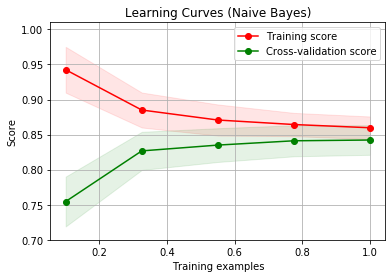

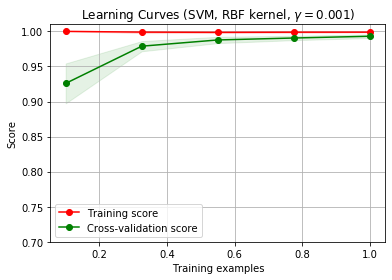

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_Curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=None,train_sizes = np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    test_size,train_score,test_score = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_score,axis =1)
    train_scores_std = np.std(train_score,axis =1)
    test_scores_mean = np.mean(test_score,axis =1)
    test_scores_std = np.std(test_score,axis =1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

digits = load_digits()

X,y = digits.data,digits.target

# ------------Plot Learning Curve using (Naive Bayes)

title =  "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()

plot_learning_Curve(estimator,title,X,y,ylim =(0.7,1.01),cv=cv,n_jobs=4)

# ------------Plot Learning Curve Using(SVM)
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_Curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()